In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_regression

In [2]:
df = pd.read_excel('EV_states_data.xlsx')

In [3]:
df.head(20)

,Sl. No,State,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state
0,1,Meghalaya,0,0,0,0,0,6,0,6
1,2,Nagaland,0,20,3,0,0,1,0,24
2,3,Manipur,16,8,11,0,5,12,0,52
3,4,Tripura,28,9,36,0,0,8,0,81
4,5,Andaman & Nicobar islands,0,0,0,0,0,82,0,82
5,6,Himachal Pradesh,0,0,0,0,0,98,0,98
6,7,Jammu & Kashmir,2,76,152,0,0,208,0,438
7,8,Goa,0,0,0,0,0,513,1,514
8,9,Dadra and Nagar Haveli,4,0,9,0,0,803,0,816
9,10,Jharkhand,75,228,736,9,7,655,0,1710


In [19]:
df.reset_index(drop=True, inplace=True)

<AxesSubplot:title={'center':'EV states data'}, xlabel='State'>

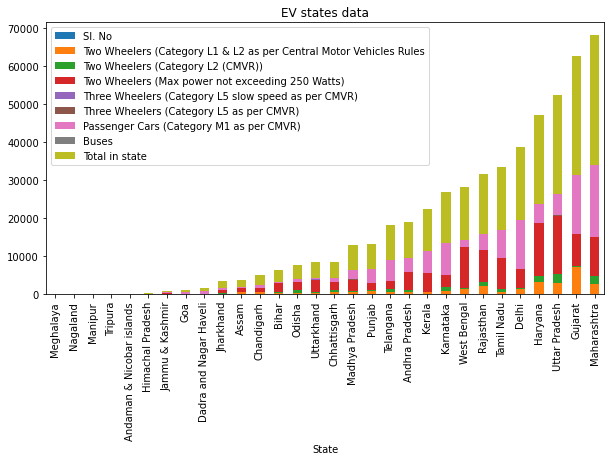

In [21]:
# x= df["State"]
# y1= df["Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules"]
# y2 = df["Three Wheelers (Category L5 slow speed as per CMVR)"]
# y3=df["Passenger Cars (Category M1 as per CMVR)	"]
# y4=["Buses"]
# plt.bar(x, y1, color='r')
# plt.bar(x, y1, color='r')
df.plot(x='State', kind='bar', stacked=True,
        title='EV states data',figsize=(10,5))

In [34]:
df1=pd.read_excel('charging-stations (1).xlsx')

In [35]:
df1.head()

,State Name,No.of Operational Public Charging Stations
0,Andaman & Nicobar,3
1,Andhra Pradesh,222
2,Arunachal Pradesh,9
3,Assam,48
4,Bihar,83


<AxesSubplot:ylabel='No.of Operational Public Charging Stations'>

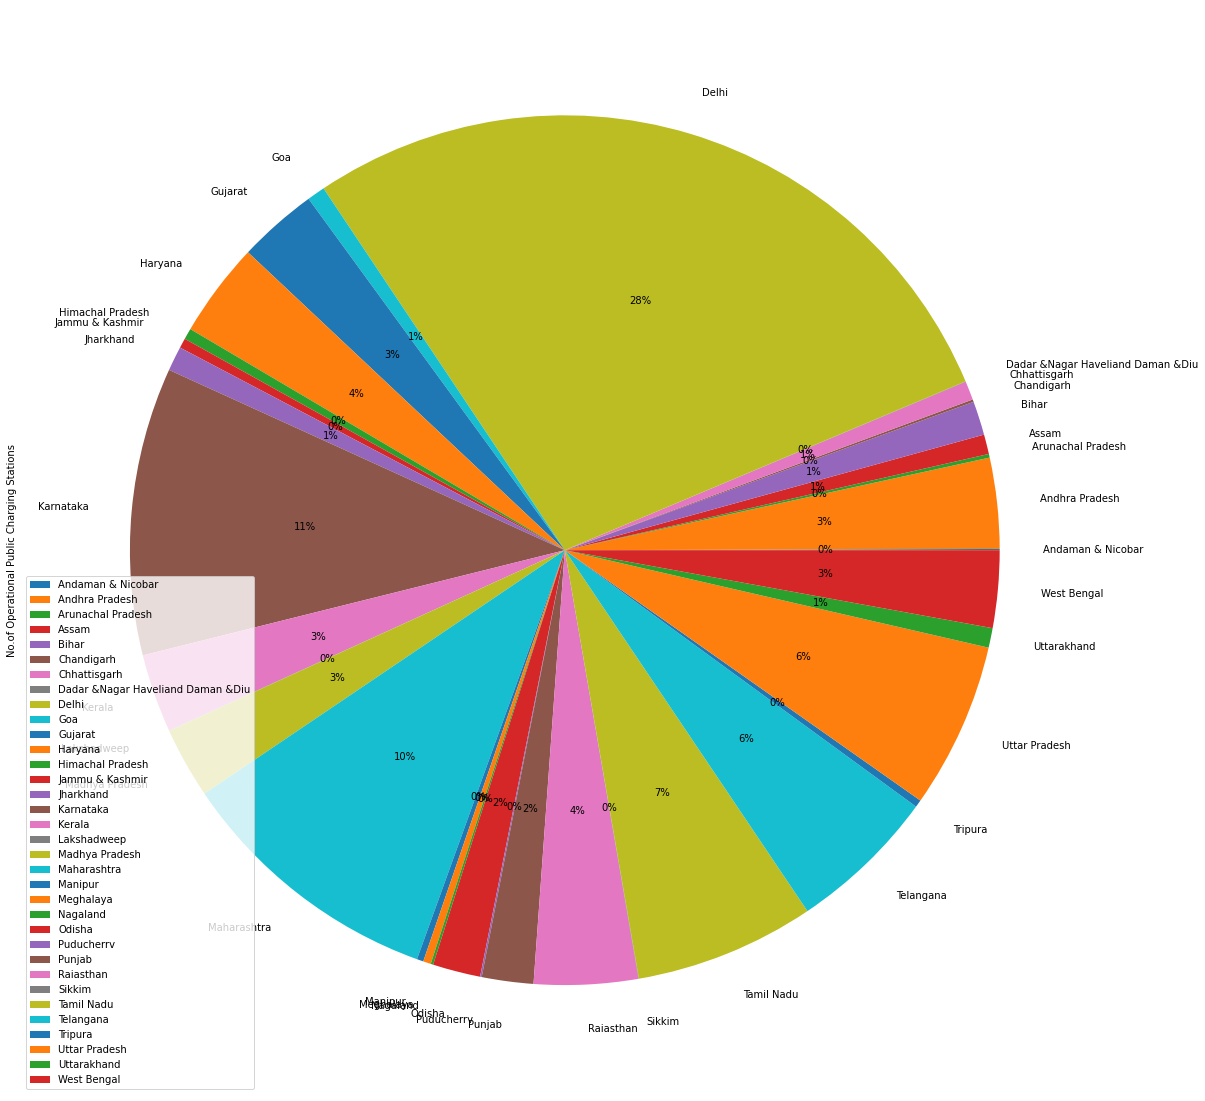

In [36]:
df1.groupby(['State Name']).sum().plot(
    kind='pie', y='No.of Operational Public Charging Stations', 
  autopct='%1.0f%%',figsize=(20,20))

<AxesSubplot:title={'center':'No.of charging stations per states'}, xlabel='State Name'>

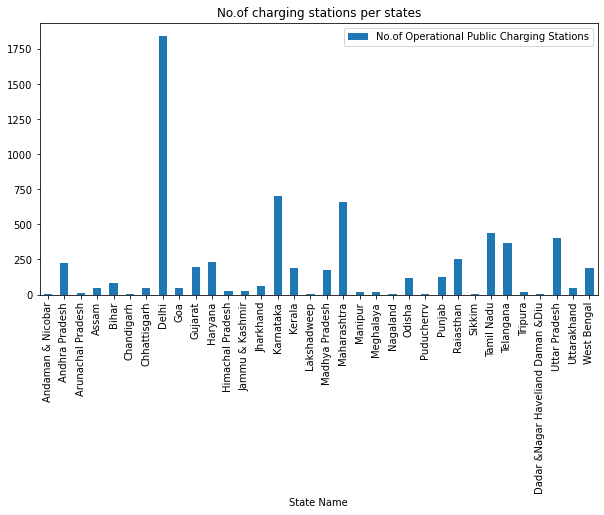

In [37]:
df1.plot(x='State Name', kind = 'bar',title='No.of charging stations per states',figsize=(10,5) )

In [38]:
df2 = pd.read_csv('4-wheeler-EV-carwale.csv')

In [39]:
df2.head()

,review,Exterior,Comfort,Performance,Fuel Economy,Value for Money,Condition,driven,rating,model_name
0,Superb car like as fantastic as petroleum car....,5.0,4.0,5.0,5.0,5.0,New,Few hundred kilometers,5.0,hyundai kona
1,"Anti national, worst service, worst customer c...",1.0,1.0,1.0,1.0,1.0,New,Haven't driven it,0.0,hyundai kona
2,Super happy with it. The car is too good,4.0,5.0,5.0,5.0,4.0,New,Few thousand kilometers,5.0,hyundai kona
3,"Pretty good car, smooth as a glider fast car, ...",5.0,5.0,5.0,5.0,5.0,New,Few thousand kilometers,5.0,hyundai kona
4,Price difference between petrol and electronic...,4.0,4.0,5.0,3.0,2.0,Not Purchased,Haven't driven it,3.0,hyundai kona


In [40]:
df2['Condition'].unique()

array(['New', 'Not Purchased', 'Used'], dtype=object)

In [41]:
df2['Condition'].value_counts()

New              63
Not Purchased    46
Used             20
Name: Condition, dtype: int64

(array([0, 1, 2]),
 [Text(0, 0, 'New'), Text(1, 0, 'Not Purchased'), Text(2, 0, 'Used')])

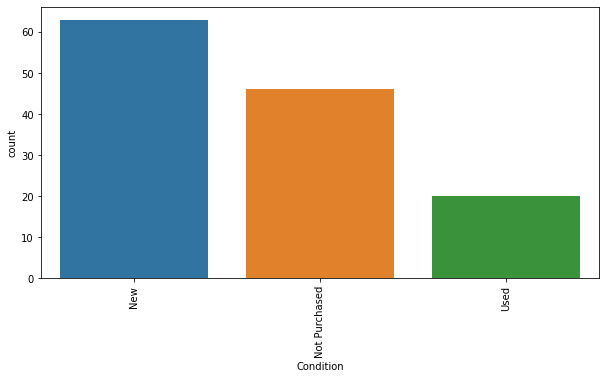

In [42]:
sns.countplot(x='Condition',data=df2) 
plt.xticks(rotation=90)

In [43]:
df2['driven'].unique()

array(['Few hundred kilometers', "Haven't driven it",
       'Few thousand kilometers', 'Did a short drive once',
       'Its my mate since ages'], dtype=object)

In [44]:
df2['driven'].value_counts()

Did a short drive once     37
Few thousand kilometers    34
Few hundred kilometers     31
Haven't driven it          25
Its my mate since ages      2
Name: driven, dtype: int64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Few hundred kilometers'),
  Text(1, 0, "Haven't driven it"),
  Text(2, 0, 'Few thousand kilometers'),
  Text(3, 0, 'Did a short drive once'),
  Text(4, 0, 'Its my mate since ages')])

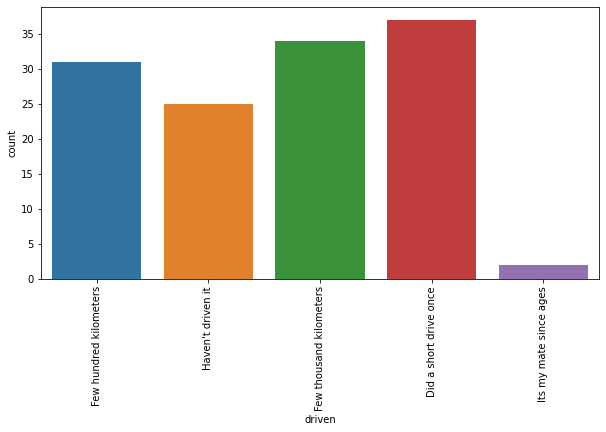

In [45]:
sns.countplot(x='driven',data=df2) 
plt.xticks(rotation=90)